# Clustering Exercices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_connection, new_zillow_data, get_zillow_data

<h5> #1) Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.
    

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
    
Only include properties that include a latitude and longitude value. </h5>

------

In [2]:
df = pd.read_csv("zillowcluster_df.csv")

In [3]:
longindex = df.loc[df['longitude'].isin(['NaN'])].index

In [4]:
 df.drop(longindex , inplace=True)

----

<h5>Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)</h5>

---

In [5]:
df.shape

(77380, 68)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 0 to 77412
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77380 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   heatingorsystemtypeid         49439 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77380 non-null  int64  
 8   id                            77380 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77380 non-null  float64
 11  bedroomcnt                    77380 non-null  float64
 12  buildingqualitytypeid         49671 non-null  float64
 13  c

In [7]:
df.propertylandusetypeid.value_counts()

261.0    52319
266.0    19294
246.0     2009
269.0     1944
248.0      727
247.0      535
265.0      333
263.0       74
275.0       58
260.0       37
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

<AxesSubplot:>

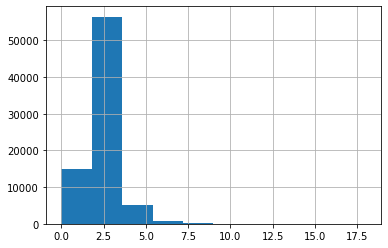

In [8]:
df.bathroomcnt.hist()

In [9]:
df.isnull().sum()

Unnamed: 0                          0
typeconstructiontypeid          77158
storytypeid                     77330
heatingorsystemtypeid           27941
buildingclasstypeid             77365
architecturalstyletypeid        77174
airconditioningtypeid           52427
parcelid                            0
id                                  0
basementsqft                    77330
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27709
calculatedbathnbr                 609
decktypeid                      76766
finishedfloor1squarefeet        71357
calculatedfinishedsquarefeet      196
finishedsquarefeet12             3632
finishedsquarefeet13            77339
finishedsquarefeet15            74371
finishedsquarefeet50            71357
finishedsquarefeet6             76994
fips                                0
fireplacecnt                    69104
fullbathcnt                       609
garagecarcnt                    51906
garagetotals

<h5>Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.</h5>

In [10]:

def missing_zero_values_table(df):
    
    '''This function will look at any data set and report back on zeros and nulls for every column while also giving percentages of total values
        and also the data types. The message prints out the shape of the data frame and also tells you how many columns have nulls '''
    
    
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " +  str((mz_table['null_count'] != 0).sum()) +
          " columns that have NULL values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)

    return mz_table

missing_zero_values_table(df)

Your selected dataframe has 68 columns and 77380 Rows.
There are 52 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
buildingclasstypeid,0,77365,100.0,77365,100.0,float64
buildingclassdesc,0,77365,100.0,77365,100.0,object
finishedsquarefeet13,0,77339,99.9,77339,99.9,float64
storytypeid,0,77330,99.9,77330,99.9,float64
storydesc,0,77330,99.9,77330,99.9,object
basementsqft,0,77330,99.9,77330,99.9,float64
yardbuildingsqft26,0,77310,99.9,77310,99.9,float64
fireplaceflag,0,77208,99.8,77208,99.8,float64
architecturalstyletypeid,0,77174,99.7,77174,99.7,float64
architecturalstyledesc,0,77174,99.7,77174,99.7,object


----

<h4>Takeaways</h4>

Will need to look at individual columns to determine how to handle missing values. 

---

Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

----

In [11]:
def features_missing(df):
    
    '''This function creates a new dataframe that analyzes the total features(columns) missing for the rows in
    the data frame. It also give s a percentage'''
    
    
    df2 = df.isnull().sum(axis =1).value_counts().sort_index(ascending=False)
    df2 = pd.DataFrame(df2)
    df2.reset_index(level=0, inplace=True)
    df2.columns= ['total_features_missing', 'total_rows_affected'] 
    df2['pct_features_missing']= round((df2.total_features_missing /df.shape[1]) * 100, 2)
    df2 = df2[['total_features_missing', 'pct_features_missing', 'total_rows_affected']]
    
    return df2

In [12]:
df2 = df.isnull().sum(axis =1).value_counts().sort_index(ascending=False)

In [13]:
type(df2)

pandas.core.series.Series

In [14]:
df2 = pd.DataFrame(df2)

In [15]:
df2.reset_index(level=0, inplace=True)

In [16]:
df2.columns

Index(['index', 0], dtype='object')

In [17]:
df2.columns= ['total_features_missing', 'total_rows_affected'] 

In [18]:
df2.head()

,total_features_missing,total_rows_affected
0,48,3
1,47,3
2,46,5
3,45,50
4,44,78


In [19]:
df2['pct_features_missing']= round((df2.total_features_missing /df.shape[1]) * 100, 2)

In [20]:
df2 = df2[['total_features_missing', 'pct_features_missing', 'total_rows_affected']]

In [21]:
df2.head(26)

,total_features_missing,pct_features_missing,total_rows_affected
0,48,70.59,3
1,47,69.12,3
2,46,67.65,5
3,45,66.18,50
4,44,64.71,78
5,43,63.24,28
6,42,61.76,23
7,41,60.29,29
8,40,58.82,230
9,39,57.35,285


-----

<h5><b>Prepare</b></h5>

    
<h5>Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.</h5>

--

In [22]:
cleanpropindexes250 = df.loc[df['propertylandusetypeid'] <= 250].index

In [23]:
df.drop(cleanpropindexes250 , inplace=True)

In [24]:
df.shape

(74094, 68)

In [25]:
df.propertylandusetypeid.value_counts()

261.0    52319
266.0    19294
269.0     1944
265.0      333
263.0       74
275.0       58
260.0       37
267.0       29
264.0        6
Name: propertylandusetypeid, dtype: int64

In [26]:
df.unitcnt.value_counts()

1.0    47262
2.0       33
3.0        3
4.0        2
6.0        1
Name: unitcnt, dtype: int64

-----

<h4> Takeaway </h4>

We have 39 properties showing more than 1 unit. These can be dropped as they won't have an affect on the dataset since it's such a small value

----

In [27]:
df.unitcnt.isnull().value_counts()

False    47301
True     26793
Name: unitcnt, dtype: int64

----

<h4>Takeaway</h4>

we have 26,793 rows with null values. These need to be filled in with a 1 as they are more than likley single unit properties based on the property filter type already done.

---

In [28]:
df.bedroomcnt.value_counts()

3.0     29871
2.0     18895
4.0     16559
5.0      4127
1.0      3356
6.0       650
0.0       489
7.0       108
8.0        25
9.0         8
11.0        2
10.0        2
14.0        1
12.0        1
Name: bedroomcnt, dtype: int64

In [29]:
singlecountindexes = df.loc[df['unitcnt'] > 1].index

In [30]:
df.drop(singlecountindexes , inplace=True)

In [31]:
df.bedroomcnt.value_counts()

3.0     29862
2.0     18888
4.0     16550
5.0      4124
1.0      3355
6.0       649
0.0       486
7.0       107
8.0        23
9.0         8
10.0        2
11.0        1
Name: bedroomcnt, dtype: int64

In [32]:
df.fireplacecnt.value_counts()

1.0    6994
2.0     993
3.0     233
4.0      35
5.0       3
Name: fireplacecnt, dtype: int64

In [33]:
df.fireplaceflag.value_counts()

1.0    172
Name: fireplaceflag, dtype: int64

In [34]:
df.fireplaceflag.isnull().value_counts()

True     73883
False      172
Name: fireplaceflag, dtype: int64

In [35]:
df.poolcnt.value_counts()

1.0    16094
Name: poolcnt, dtype: int64

In [36]:
df.poolcnt.isnull().value_counts()

True     57961
False    16094
Name: poolcnt, dtype: int64

----

<h4>Takeaway</h4>

Now that the unit counts greater than 1 are taken care of, we need to fill in then null values with a value of 1 to complete the exercises

---

In [37]:
df["unitcnt"].fillna( 1 , inplace = True)

In [38]:
df.unitcnt.isnull().value_counts()

False    74055
Name: unitcnt, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74055 entries, 0 to 77412
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    74055 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   heatingorsystemtypeid         48510 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24729 non-null  float64
 7   parcelid                      74055 non-null  int64  
 8   id                            74055 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   74055 non-null  float64
 11  bedroomcnt                    74055 non-null  float64
 12  buildingqualitytypeid         46898 non-null  float64
 13  c

---

<h5>Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).</h5>

---

In [40]:
def handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [41]:
handle_missing_values(df,prop_required_row = 0.5, prop_required_col = 0.5 )

,Unnamed: 0,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc
0,0,2.0,10711855,1087254,2.0,3.0,8.0,2.0,2107.0,2107.0,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,6.037113e+13,-0.007357,2017-07-07,Central
1,1,2.0,10711877,1072280,2.0,4.0,8.0,2.0,1882.0,1882.0,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,6.037113e+13,0.021066,2017-08-29,Central
2,2,2.0,10711888,1340933,2.0,4.0,8.0,2.0,1882.0,1882.0,...,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,6.037113e+13,0.077174,2017-04-04,Central
3,3,2.0,10711910,1878109,2.0,3.0,8.0,2.0,1477.0,1477.0,...,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,6.037113e+13,-0.041238,2017-03-17,Central
4,4,2.0,10711923,2190858,2.0,4.0,8.0,2.0,1918.0,1918.0,...,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,6.037113e+13,-0.009496,2017-03-24,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77408,77408,NaN,167686999,775695,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,26405.0,2016.0,26405.0,988.48,NaN,-0.068632,2017-02-28,NaN
77409,77409,NaN,167687739,2863262,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,5451600.0,6440197.0,2016.0,988597.0,77045.13,NaN,0.360020,2017-03-03,NaN
77410,77410,NaN,167687839,1372384,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1842678.0,2016.0,1842678.0,22045.81,NaN,0.038797,2017-05-31,NaN
77411,77411,2.0,167688532,2758757,3.0,3.0,4.0,3.0,1661.0,1661.0,...,2016.0,NaN,147921.0,2016.0,147921.0,1902.75,NaN,0.006706,2017-02-03,Central


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74055 entries, 0 to 77412
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    74055 non-null  int64  
 1   heatingorsystemtypeid         48510 non-null  float64
 2   parcelid                      74055 non-null  int64  
 3   id                            74055 non-null  int64  
 4   bathroomcnt                   74055 non-null  float64
 5   bedroomcnt                    74055 non-null  float64
 6   buildingqualitytypeid         46898 non-null  float64
 7   calculatedbathnbr             73784 non-null  float64
 8   calculatedfinishedsquarefeet  73864 non-null  float64
 9   finishedsquarefeet12          73647 non-null  float64
 10  fips                          74055 non-null  float64
 11  fullbathcnt                   73784 non-null  float64
 12  latitude                      74055 non-null  float64
 13  l

In [43]:
features_missing(df)

,total_features_missing,pct_features_missing,total_rows_affected
0,13,38.24,3
1,12,35.29,4
2,11,32.35,6
3,10,29.41,62
4,9,26.47,77
5,8,23.53,43
6,7,20.59,41
7,6,17.65,128
8,5,14.71,6125
9,4,11.76,18407


<h4>Takeaways</h4>

In [44]:
df['roomcnt'].value_counts()

0.0     56507
6.0      4507
7.0      3838
5.0      3007
8.0      2871
4.0      1412
9.0      1193
10.0      339
3.0       207
11.0      108
12.0       35
2.0        13
13.0       10
14.0        6
15.0        1
1.0         1
Name: roomcnt, dtype: int64

-----

Room count needs to be dropped. Over 56,000 rows have a zero count. Using median, mean, or mode won't work as this data will be too skewed

----

In [45]:
df.drop('roomcnt', axis=1, inplace=True)

In [46]:
indexregionidecity = df.loc[df['regionidcity'].isnull()].index 
df.drop(indexregionidecity, inplace=True)

In [47]:
indexfullbathcnt = df.loc[df['fullbathcnt'].isnull()].index 
df.drop(indexfullbathcnt, inplace=True)

In [48]:
indexcensus = df.loc[df['censustractandblock'].isnull()].index 
df.drop(indexcensus, inplace=True)

In [49]:
indexstructurevalue = df.loc[df['structuretaxvaluedollarcnt'].isnull()].index 
df.drop(indexstructurevalue, inplace=True)

In [50]:
dropcols = ['regionidzip', 'finishedsquarefeet12', 'propertyzoningdesc', 'buildingqualitytypeid']

In [51]:
df.drop(dropcols, axis=1, inplace=True)

In [52]:
df['yearbuilt'].fillna((df['yearbuilt'].median()), inplace=True)

In [53]:
indexsquarefeet = df.loc[df['calculatedfinishedsquarefeet'].isnull()].index 
df.drop(indexsquarefeet, inplace=True)

In [54]:
indextaxamount = df.loc[df['taxamount'].isnull()].index 
df.drop(indextaxamount, inplace=True)

In [55]:
df['bedroomcnt'].replace(0,df['bedroomcnt'].median(axis=0),inplace=True)

In [56]:
df['heatingorsystemdesc'].value_counts()

Central       32436
Floor/Wall    13098
Yes             832
Forced air      764
Solar            65
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [57]:
df['heatingorsystemtypeid'].value_counts()

2.0     32436
7.0     13098
24.0      832
6.0       764
20.0       65
13.0       59
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64

In [58]:
df['heatingorsystemtypeid'].fillna(1, inplace=True)

In [59]:
df["heatingorsystemdesc"].fillna("None", inplace = True)

In [60]:
df['lotsizesquarefeet'].median()

7258.0

In [61]:
df['lotsizesquarefeet'].fillna((df['lotsizesquarefeet'].median()), inplace=True)

In [62]:
missing_zero_values_table(df)

Your selected dataframe has 29 columns and 72097 Rows.
There are 0 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
Unnamed: 0,1,0,0.0,1,0.0,int64
rawcensustractandblock,0,0,0.0,0,0.0,float64
transactiondate,0,0,0.0,0,0.0,object
logerror,0,0,0.0,0,0.0,float64
censustractandblock,0,0,0.0,0,0.0,float64
taxamount,0,0,0.0,0,0.0,float64
landtaxvaluedollarcnt,0,0,0.0,0,0.0,float64
assessmentyear,0,0,0.0,0,0.0,float64
taxvaluedollarcnt,0,0,0.0,0,0.0,float64
structuretaxvaluedollarcnt,0,0,0.0,0,0.0,float64


<h5>Room counts had over 56,000 with 0 rooms, so we dropped this column</h5>

In [63]:
df.shape

(72097, 29)

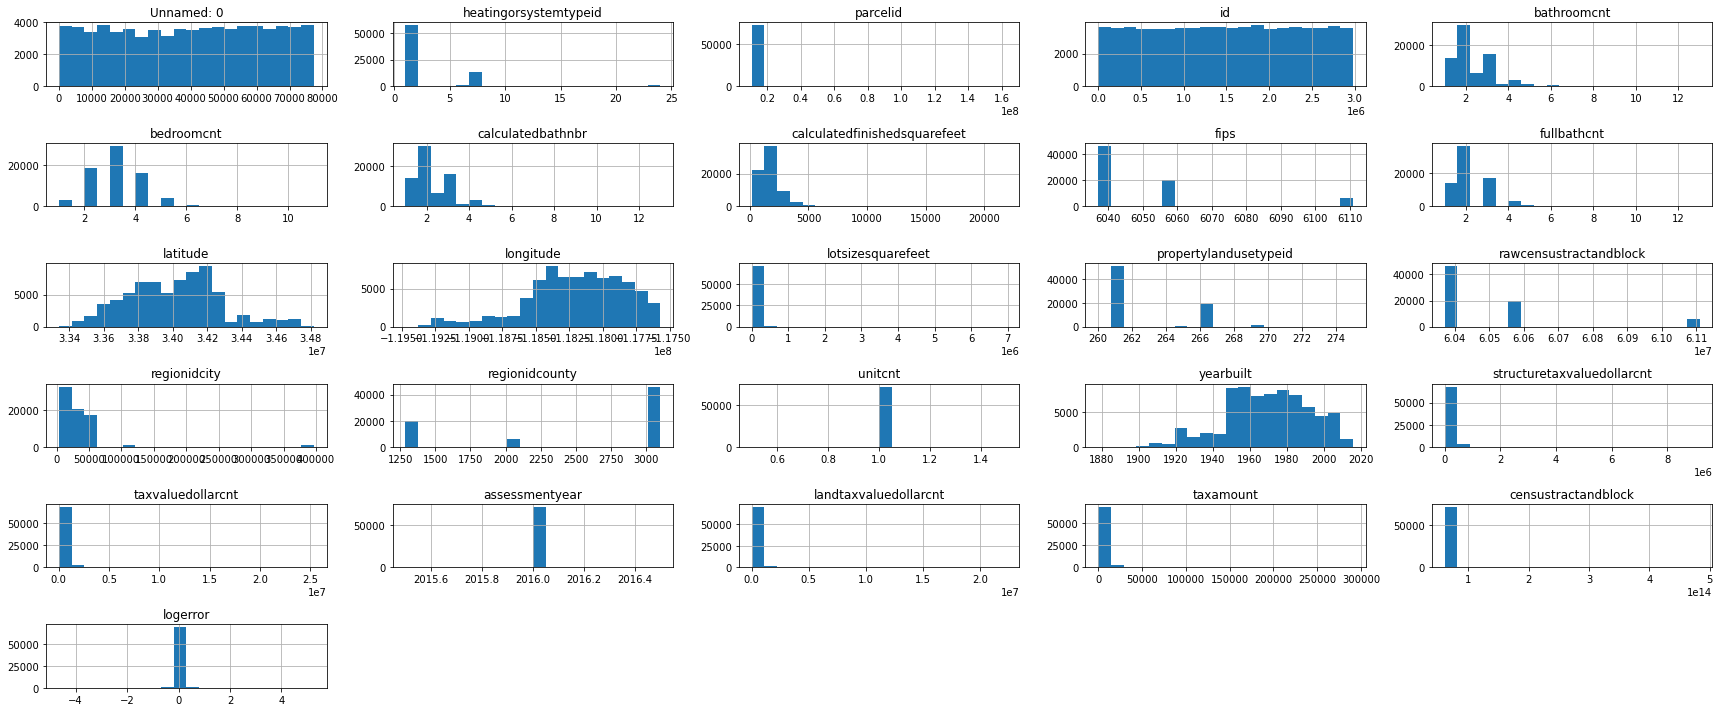

In [64]:
df.hist(figsize=(24,10), bins=20)
plt.tight_layout();

In [ ]:
# df.query('regionidzip.astype("str").str.len() != "5"') --- this would look up zip codes that are only 5 digits. have to convert to object from float